<a href="https://colab.research.google.com/github/AbinashTN/Method_Automatic_pose_recognition/blob/main/TP2_Sondage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP 2 : Sondage

#### Consignes.
>   
Répondre à chaque question dans les cellules que vous créerez après la question correspondante.

>La note prendra compte de la **présentation et de la clareté** des réponses.

>Envoyez le le fichier jupyter notebook sur le mail
marc.escudier@telecom-sudparis.eu. Le nom du fichier et le sujet du mail doit être indiqué: **<span style="color:red">TP2_NOM_PRENOM</span>**. C'est **important** pour que votre tp ne se perde pas et soit **noté**.

>**<span style="color:red">Attention</span>** à bien envoyer sur la bonne adresse mail. C'est marc.escudier@telecom-<span style="color:red">sudparis</span>.eu (une ancienne adresse désuète est présente dans le répertoire zimbra).

>Délai: Le tp est à rendre avant **<span style="color:red">avant le jeudi 24 avril 12h00 (midi) pour le Groupe 1 et
avant le vendredi 25 avril 12h00 (midi) pour le Groupe 2</span>**

>Note: Pour recevoir une note il faut rendre **<span style="color:red">les 2 TPs</span>**: celui-ci et celui sur les tests.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stat
import seaborn as sns
%matplotlib inline
from google.colab import files
uploaded = files.upload()


Saving pop_paroisses.sas7bdat to pop_paroisses.sas7bdat


# Exercice 1 : plan de sondage simple



> ### 1.
Importer le fichier "pop_paroisses.sas7bdat" dans une dataframe de nom `paroisse` avec la commande `pd.read_sas`. Faites apparaître les 5 premières lignes.
Remarque : vous pouvez utiliser l'option `encoding="latin1"` pour avoir le français affiché correctement.

In [6]:
paroisse = pd.read_sas("./pop_paroisses.sas7bdat", encoding="latin1")
print(len(paroisse))
print(paroisse[0:5])

210
           paroisse     code  naissance  deces  mar   mrc  region   pop99  \
0  Berthier-sur-Mer  18065.0       11.0    8.0  2.0  18.0    12.0  1271.0   
1           Brébeuf  78075.0        7.0    1.0  3.0  78.0    15.0   772.0   
2   Calixa-Lavallée  59030.0        8.0    5.0  7.0  59.0    16.0   493.0   
3        Courcelles  30090.0        9.0    3.0  3.0  30.0     5.0   988.0   
4     Grande-Vallée   3020.0       14.0    6.0  2.0   3.0    11.0  1432.0   

    pop00   pop01  strate  
0  1306.0  1285.0     2.0  
1   782.0   789.0     1.0  
2   491.0   491.0     1.0  
3   996.0   975.0     2.0  
4  1390.0  1362.0     2.0  


> ### 2.
Utiliser l'option `.sample` d'une dataframe panda pour sélectionner un échantillon de 25 individus en utilisant un plan de sondage simple et sans remise a probabilité égale. Sauvegarder les résultats dans une dataframe de nom `par_sam`.

In [14]:
par_sam = paroisse.sample(25)
print(par_sam)

                                     paroisse     code  naissance  deces  \
161                            Saint-Narcisse  37040.0       17.0   25.0   
36                              Saint-Antonin  12015.0       40.0   25.0   
104                              Saint-Eugène  17050.0       17.0   14.0   
181                    Saint-Rémi-de-Tingwick  39020.0        3.0    0.0   
192                             Saint-Séverin  27070.0        4.0    0.0   
128                   Saint-Jacques-le-Mineur  68040.0       16.0    9.0   
2                             Calixa-Lavallée  59030.0        8.0    5.0   
13                      Notre-Dame-de-la-Paix  80020.0        7.0    2.0   
88                        Sainte-Jeanne-d'Arc   9020.0        2.0    2.0   
144                       Saint-Léon-le-Grand   7030.0        9.0    5.0   
197                             Saint-Sulpice  60020.0       49.0    9.0   
59                               Saint-Didace  52090.0        5.0    5.0   
6           

> ### 3.
Calculer le $\pi$-estimateur du total et de la moyenne des naissances.

In [15]:
#probabilité d'inclusion ici uniforme
prob_inclusion = 25/210
pi_sum = par_sam['naissance'].sum()/prob_inclusion

print(" Somme pi-estimée du nombre de naissance dans la population :", pi_sum)

pi_avg = pi_sum /210

print( "Moyenne pi_estimée du nombre de naissance dans la population :", pi_avg)



 Somme pi-estimée du nombre de naissance dans la population : 2385.6
Moyenne pi_estimée du nombre de naissance dans la population : 11.36


> ### 4.
Refaire le sondage 100 fois, et tracer un graphique ou apparaissent la vraie valeur du total et ses valeurs estimées. Que remarque-t-on?

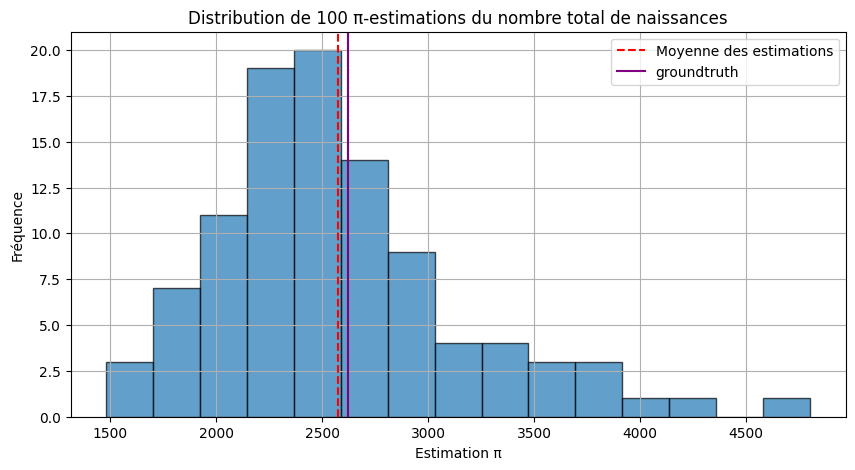

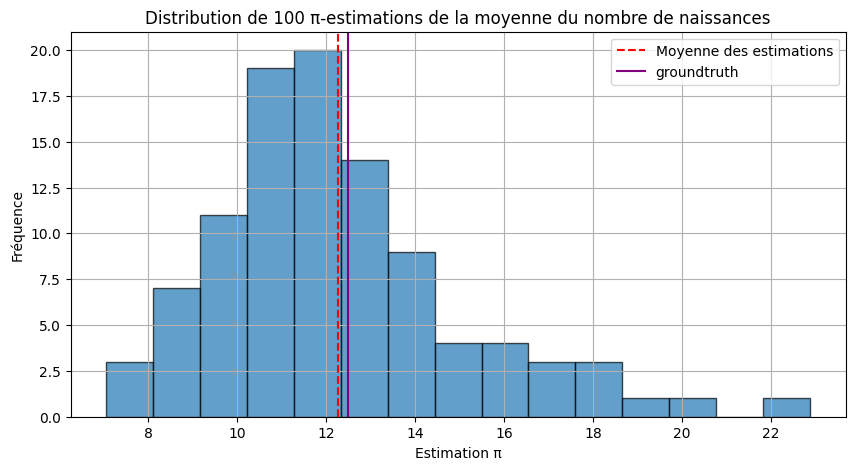

In [16]:
estimations_Somme = []
estimations_AVG = []

for i in range(100) :
    par_sam = paroisse.sample(25, replace = False)
    prob_inclusion = 25/210
    pi_sum = par_sam['naissance'].sum()/prob_inclusion
    pi_avg = pi_sum /210
    estimations_Somme.append(pi_sum)
    estimations_AVG.append(pi_avg)

real_sum = paroisse['naissance'].sum()
real_avg = real_sum / 210

# Affichage du graphique
plt.figure(figsize=(10, 5))
plt.hist(estimations_Somme, bins=15, edgecolor='black', alpha=0.7)
plt.axvline(np.mean(estimations_Somme), color='red', linestyle='--', label='Moyenne des estimations')
plt.axvline(real_sum, color = 'purple', label = 'groundtruth')
plt.title("Distribution de 100 π-estimations du nombre total de naissances")
plt.xlabel("Estimation π")
plt.ylabel("Fréquence")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.hist(estimations_AVG, bins=15, edgecolor='black', alpha=0.7)
plt.axvline(np.mean(estimations_AVG), color='red', linestyle='--', label='Moyenne des estimations')
plt.axvline(real_avg, color = 'purple', label = 'groundtruth')
plt.title("Distribution de 100 π-estimations de la moyenne du nombre de naissances")
plt.xlabel("Estimation π")
plt.ylabel("Fréquence")
plt.legend()
plt.grid(True)
plt.show()

# Exercice 2

> ### 1.
Importer le fichier "pop.sas7bdat" dans une dataframe de nom `lib`. Ce fichier contient 1000 réalisations d'une variable y.

In [24]:
lib = pd.read_sas("./pop.sas7bdat", encoding = "latin1")
print(lib[0:5])

     i           y
0  1.0   83.631107
1  2.0  115.620297
2  3.0   73.585786
3  4.0  130.878799
4  5.0   58.350731


>### 2.
Vérifier que la moyenne des réalisations est bien 100.

In [25]:
mean = lib["y"].sum()/1000
print(mean)

100.000000033836


>### 3.
Effectuer `100` fois un plan de songade (sans remise et à probabilités égales) de taille `10`. Sauvegarder les moyennes estimées dans une array de nom `estim`.

In [26]:
estim = []
pi = 10 / 1000
for i in range(100) :
    df = lib.sample(10, replace = False)
    estim.append(df["y"].sum()/pi)


>### 4.
Si $\hat m$ est l'estimateur par le plan de sondage précédent, quelle est sa variance théorique?

In [27]:
#La variance théorique est :
S2 = lib['y'].var(ddof = 0)
print(S2)
var_theorique = (1 - 10/1000)*(S2/10)
print(var_theorique)

996.276656886915
98.63138903180459


>### 5.

> On rappelle que l'erreur relative de l'estimation de $m$ par $\hat m$
$$\frac{\hat m- m}{|m|}\, .$$

> Calculer les erreurs relatives des sondages effectués et tracer la courbe correspondante.

> On tracera en rouge la ligne horizontale $y=0$.

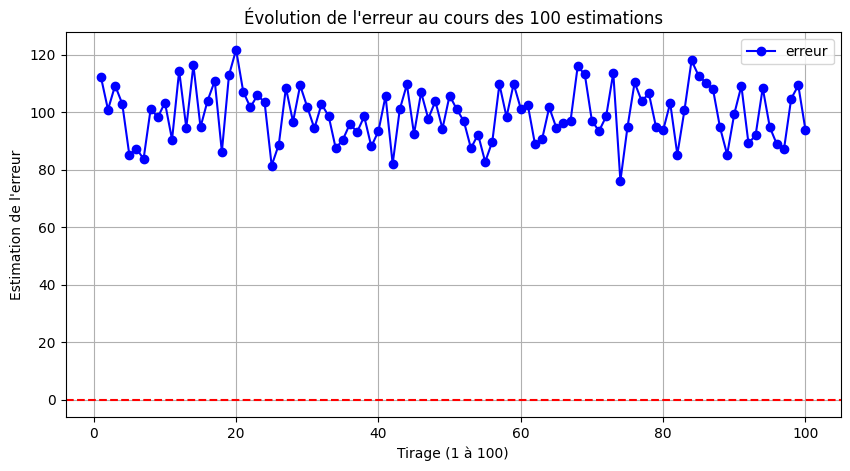

In [28]:
erreurs = []
for i in range(100) :
    erreurs.append((estim[i]-1000) / 1000)

x = np.arange(1, 101)
y = erreurs
plt.figure(figsize=(10, 5))
plt.plot(x, y, marker='o', linestyle='-', color='blue', label='erreur')
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Évolution de l'erreur au cours des 100 estimations")
plt.xlabel("Tirage (1 à 100)")
plt.ylabel("Estimation de l'erreur")
plt.legend()
plt.grid(True)
plt.show()

>### 6.
Soit $\hat m_1$ la moyenne des moyennes des 100 echantillons. Calculer $\hat m_1$ et comparer à la vraie moyenne.

In [29]:
s=0
for i in range(100) :
    s+=estim[i]

#On divise par 10 000 cad 1000*100 car on divise par 1000 chaque somme estimé puis par 100 car on en a estimé 100
m1 = (s)/100000
print(len(estim))
print(m1)
print(mean)

100
100.26609709279411
100.000000033836


>### 7.
Est-ce que $\hat m_1$ est un estimateur sans biais? Quelle est le lien entre sa variance et la variance de $\hat m$?

In [30]:
print(mean - m1)
#m1 - mean est environ égale à 0 donc on peut dire que l'estimateur est sans biais

-0.26609705895810976


>### 8.
On veut maintenant estimer la variance de notre estimateur $\hat m$. Calculer sa variance empirique en se rappelant que la vraie moyenne est de `100`.

>Commenter.

In [31]:
variance_empirique = np.mean([(m - mean)**2 for m in estim])
var_empirique = np.var(estim, ddof=1)
print(variance_empirique)
print(var_empirique)
#la variance est très élevé car la taille de l'echantillon est très petite

10122156671.269543
89807741.89218424


>### 9.
Refaire l'expérience précédente pour des valeurs croissantes de la taille du sondage. Que remarque-t-on?

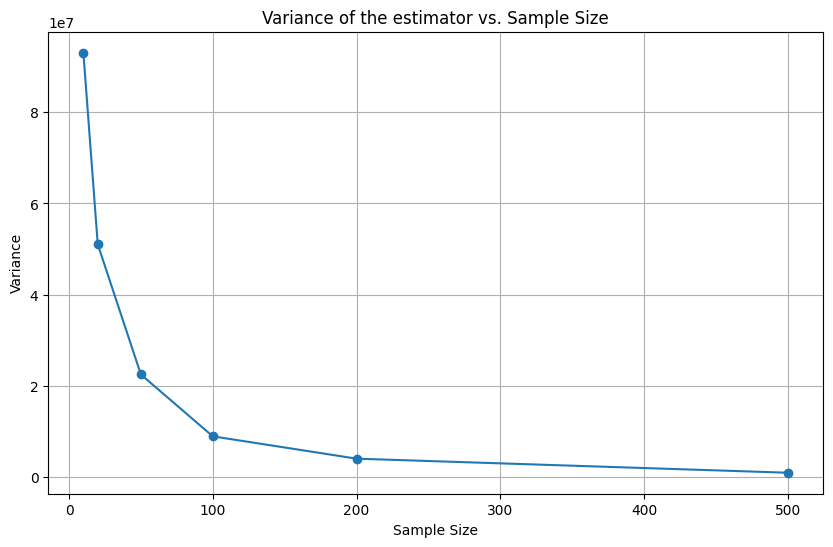

In [34]:
sample_sizes = [10, 20, 50, 100, 200, 500]
variances = []

for sample_size in sample_sizes:
    estim = []
    pi = sample_size / 1000
    for i in range(100):
        df = lib.sample(sample_size, replace=False)
        estim.append(df["y"].sum() / pi)

    variances.append(np.var(estim, ddof=1))

plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, variances, marker='o', linestyle='-')
plt.title('Variance of the estimator vs. Sample Size')
plt.xlabel('Sample Size')
plt.ylabel('Variance')
plt.grid(True)
plt.show()

#La variance diminue lorsuq'on augmente la taille de l'echantillon

## Exercice 3 : plan de sondage stratifié

L’objectif de cet exercice est de réaliser un plan de sondage stratifié et de faire ensuite une estimation par le
$\pi$-estimateur.

On travaillera sur la dataframe `paroisse` de l'exercice 1.

>### 1.
Que font les commandes suivantes?

In [7]:
paroisse.groupby("strate", group_keys=False).size()
#Groupe les données par valeurs de strate

,0
strate,
1.0,105
2.0,63
3.0,21
4.0,21


In [8]:
paroisse.groupby("strate", group_keys=False).apply(lambda x: x.sample(2))

<ipython-input-8-35b770c87427>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  paroisse.groupby("strate", group_keys=False).apply(lambda x: x.sample(2))


,paroisse,code,naissance,deces,mar,mrc,region,pop99,pop00,pop01,strate
127,Saint-Irénée,15005.0,6.0,8.0,3.0,15.0,3.0,617.0,613.0,599.0,1.0
205,Saint-Zénon-du-Lac-Humqui,7035.0,3.0,2.0,0.0,7.0,1.0,453.0,445.0,421.0,1.0
110,Saint-Fabien-de-Panet,18015.0,11.0,18.0,2.0,18.0,12.0,1023.0,1012.0,1016.0,2.0
167,Saint-Norbert,52070.0,10.0,8.0,2.0,52.0,14.0,1108.0,1095.0,1088.0,2.0
63,Sainte-Anne-de-Sabrevois,56060.0,23.0,12.0,4.0,56.0,16.0,1972.0,1940.0,1946.0,3.0
175,Saint-Paul-de-l'île-aux-Noix,56035.0,15.0,13.0,3.0,56.0,16.0,1927.0,1969.0,1966.0,3.0
184,Saint-Roch-de-l'Achigan,63035.0,47.0,29.0,11.0,63.0,14.0,4475.0,4495.0,4514.0,4.0
190,Saint-Sauveur,77045.0,34.0,22.0,8.0,77.0,15.0,4535.0,4642.0,4792.0,4.0


In [9]:
paroisse.groupby("strate", group_keys=False).apply(lambda x: x.sample(frac=0.3))
# On tire 30% aléatoirement de chaque colone group by 'strate'

<ipython-input-9-b4791b378333>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  paroisse.groupby("strate", group_keys=False).apply(lambda x: x.sample(frac=0.3))


,paroisse,code,naissance,deces,mar,mrc,region,pop99,pop00,pop01,strate
92,Sainte-Louise,17060.0,8.0,4.0,0.0,17.0,12.0,828.0,808.0,802.0,1.0
52,Saint-Cyrille-de-Lessard,17045.0,8.0,10.0,2.0,17.0,12.0,817.0,815.0,810.0,1.0
16,Notre-Dame-des-Anges,23015.0,0.0,1.0,0.0,23.0,3.0,241.0,197.0,186.0,1.0
18,Notre-Dame-de-Stanbridge,46100.0,6.0,10.0,0.0,46.0,16.0,801.0,782.0,761.0,1.0
81,Sainte-Françoise,11030.0,3.0,6.0,2.0,11.0,1.0,450.0,440.0,433.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
36,Saint-Antonin,12015.0,40.0,25.0,4.0,12.0,1.0,3426.0,3397.0,3435.0,4.0
173,Saint-Paul-d'Abbotsford,55015.0,21.0,12.0,10.0,55.0,16.0,2841.0,2812.0,2863.0,4.0
197,Saint-Sulpice,60020.0,49.0,9.0,10.0,60.0,14.0,3448.0,3486.0,3444.0,4.0
19,Notre-Dame-du-Mont-Carmel,36040.0,51.0,17.0,6.0,37.0,4.0,5060.0,5055.0,5040.0,4.0


>### 2.
Completer le code suivant pour sélectionner un échantillon de `(5, 8, 5, 7)` individus dans les 4 strates.

In [10]:
taille_echantillon_strates = pd.Series([5,8,5,7], index=[1., 2., 3., 4.])

echantillon_stratifie = paroisse.groupby('strate').apply(lambda x: x.sample(taille_echantillon_strates[x.name]))

echantillon_stratifie = echantillon_stratifie.reset_index(drop=True)

print(echantillon_stratifie)

                             paroisse     code  naissance  deces   mar   mrc  \
0                          Saint-Aimé  53015.0       12.0    8.0   1.0  53.0   
1                         Saint-David  53005.0        8.0    5.0   2.0  53.0   
2               Très-Saint-Rédempteur  71125.0        1.0    0.0   0.0  71.0   
3                        Laverlochère  85050.0        5.0    5.0   0.0  85.0   
4           Saint-Zéphirin-de-Courval  50090.0       12.0    4.0   2.0  50.0   
5                      Saint-Malachie  19025.0       12.0    7.0   3.0  19.0   
6                        Saint-Siméon   5055.0        8.0   14.0   2.0   5.0   
7                        Saint-Eugène  17050.0       17.0   14.0   1.0  49.0   
8                        Saint-Justin  51045.0        6.0    8.0   2.0  51.0   
9             Saint-Michel-du-Squatec  13065.0       10.0   16.0   4.0  13.0   
10              Saint-Fabien-de-Panet  18015.0       11.0   18.0   2.0  18.0   
11         Saint-Narcisse-de-Rimouski  1

<ipython-input-10-a985ebd9cd88>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  echantillon_stratifie = paroisse.groupby('strate').apply(lambda x: x.sample(taille_echantillon_strates[x.name]))


>### 4.
Calculer les probabilités d'inclusions et les poids d'échnatillonage pour chaque strate.

In [11]:

taille_strates = paroisse.groupby('strate').size()

probabilites_inclusion = taille_echantillon_strates / taille_strates

poids_echantillonnage = 1 / probabilites_inclusion

print("Probabilités d'inclusion par strate:\n", probabilites_inclusion)
print("\nPoids d'échantillonnage par strate:\n", poids_echantillonnage)


Probabilités d'inclusion par strate:
 1.0    0.047619
2.0    0.126984
3.0    0.238095
4.0    0.333333
dtype: float64

Poids d'échantillonnage par strate:
 1.0    21.000
2.0     7.875
3.0     4.200
4.0     3.000
dtype: float64


> ### 5.
Calculer les $\pi$-estimateurs de la moyenne et du total. On effectuera $100$ fois l'expérience. Comparer ces résultats avec ceux de l'exercice 1.

<ipython-input-30-ea0d29ec8525>:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(taille_echantillon_strates[x.name]))
<ipython-input-30-ea0d29ec8525>:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(taille_echantillon_strates[x.name]))
<ipython-input-30-ea0d29ec8525>:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This be

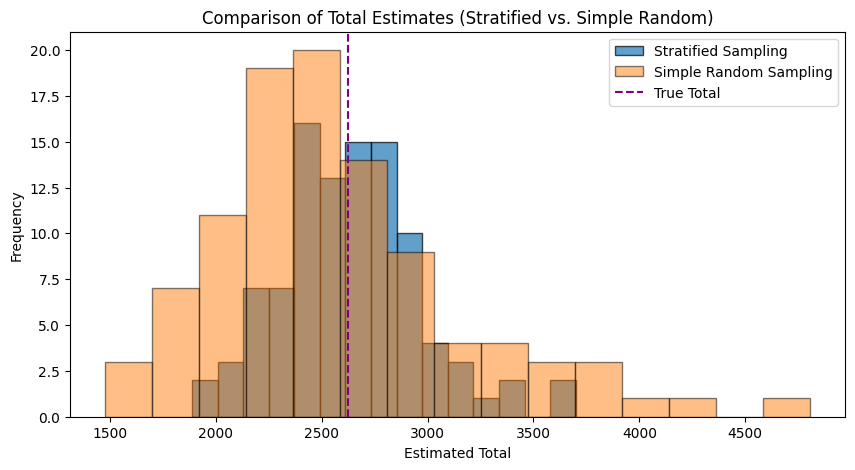

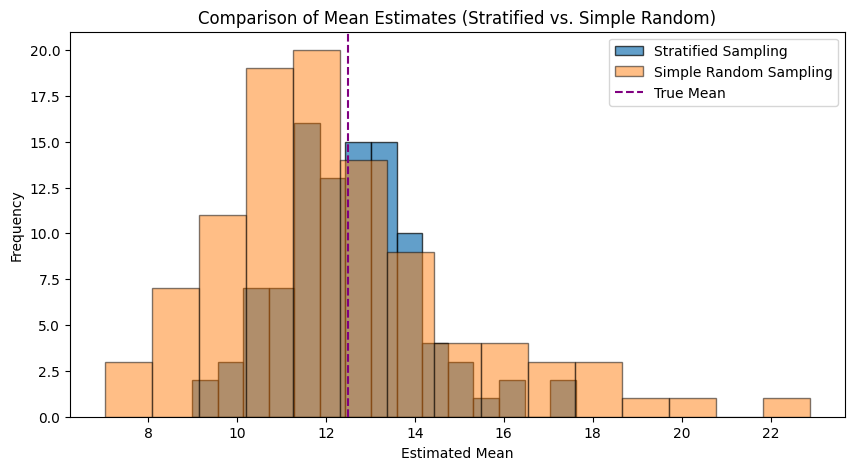

In [30]:
estimations_total_strat = []
estimations_moyenne_strat = []
for i in range(100):
    total_naissance_strat = 0
    # Définir les tailles d'échantillon pour chaque strate
    taille_echantillon_strates = pd.Series([5,8,5,7], index=[1., 2., 3., 4.])
    echantillon_stratifie = (
    paroisse
    .groupby('strate')
    .apply(lambda x: x.sample(taille_echantillon_strates[x.name]))
    .reset_index(drop=True))
    taille_strates = paroisse.groupby('strate').size()
    # On calcul la moyenne de la somme par strate :
    for strate in echantillon_stratifie['strate'].unique():
      total_naissance_strat += (echantillon_stratifie[echantillon_stratifie['strate'] == strate]['naissance'].sum() / probabilites_inclusion[strate])

    estimations_total_strat.append(total_naissance_strat)
    estimations_moyenne_strat.append(total_naissance_strat / 210)




real_sum = paroisse['naissance'].sum()
real_avg = real_sum / 210

plt.figure(figsize=(10, 5))
plt.hist(estimations_total_strat, bins=15, edgecolor='black', alpha=0.7, label='Stratified Sampling')
plt.hist(estimations_Somme, bins=15, edgecolor='black', alpha=0.5, label='Simple Random Sampling') # Assuming estimations_Somme from Exercise 1 is available
plt.axvline(real_sum, color='purple', linestyle='--', label='True Total')
plt.title('Comparison of Total Estimates (Stratified vs. Simple Random)')
plt.xlabel('Estimated Total')
plt.ylabel('Frequency')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.hist(estimations_moyenne_strat, bins=15, edgecolor='black', alpha=0.7, label='Stratified Sampling')
plt.hist(estimations_AVG, bins=15, edgecolor='black', alpha=0.5, label='Simple Random Sampling') # Assuming estimations_AVG from Exercise 1 is available
plt.axvline(real_avg, color='purple', linestyle='--', label='True Mean')
plt.title('Comparison of Mean Estimates (Stratified vs. Simple Random)')
plt.xlabel('Estimated Mean')
plt.ylabel('Frequency')
plt.legend()
plt.show()


>### 6.
Effectuer sur le modèle des questions précédentes  un plan de sondage stratifié selon la méthode proportionnelle. Comparer aux résultats précédents.

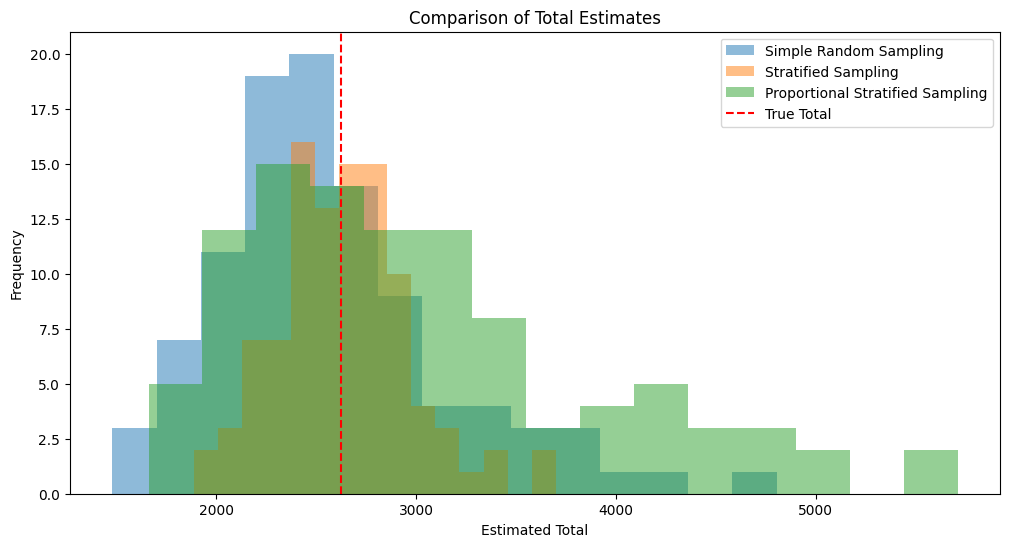

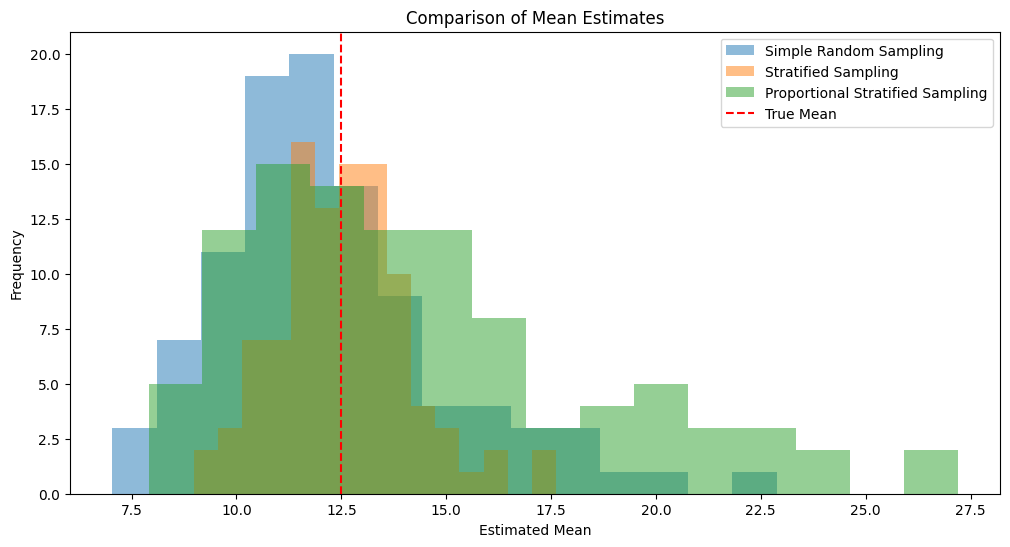

In [31]:
population_proportions = paroisse.groupby('strate').size() / len(paroisse)

# Calcul les proportions dans le cas d'un sondage ou l'on tire 25 samples
proportional_sample_sizes = (population_proportions * 25).round().astype(int)


probabilites_inclusion_prop = proportional_sample_sizes / taille_strates
poids_echantillonnage_prop = 1 / probabilites_inclusion_prop


estimations_total_prop = []
estimations_moyenne_prop = []
for _ in range(100):
    total_naissance_prop = 0
    echantillon = paroisse.sample(25)
    for strate in echantillon['strate'].unique():
        total_naissance_prop += (echantillon[echantillon['strate'] == strate]['naissance'].sum() / probabilites_inclusion_prop[strate])
    estimations_total_prop.append(total_naissance_prop)
    estimations_moyenne_prop.append(total_naissance_prop / 210)


plt.figure(figsize=(12, 6))
plt.hist(estimations_Somme, bins=15, alpha=0.5, label='Simple Random Sampling')
plt.hist(estimations_total_strat, bins=15, alpha=0.5, label='Stratified Sampling')
plt.hist(estimations_total_prop, bins=15, alpha=0.5, label='Proportional Stratified Sampling')
plt.axvline(real_sum, color='red', linestyle='--', label='True Total')
plt.title('Comparison of Total Estimates')
plt.xlabel('Estimated Total')
plt.ylabel('Frequency')
plt.legend()
plt.show()


plt.figure(figsize=(12, 6))
plt.hist(estimations_AVG, bins=15, alpha=0.5, label='Simple Random Sampling')
plt.hist(estimations_moyenne_strat, bins=15, alpha=0.5, label='Stratified Sampling')
plt.hist(estimations_moyenne_prop, bins=15, alpha=0.5, label='Proportional Stratified Sampling')
plt.axvline(real_avg, color='red', linestyle='--', label='True Mean')
plt.title('Comparison of Mean Estimates')
plt.xlabel('Estimated Mean')
plt.ylabel('Frequency')
plt.legend()
plt.show()


## Exercice 4 : Plan stratifié optimal

Dans cet exercice on veut coder le plan stratifié optimal pour le total. On travaillera toujours sur la dataframe `paroisse`.

>### 1.
Calculez les variances corrigées pour chaque strate

In [32]:
corrected_variances = paroisse.groupby('strate')['naissance'].var(ddof=1)
corrected_variances


,naissance
strate,
1.0,40.354945
2.0,30.564260
3.0,74.561905
4.0,1192.147619


>### 2.
Calculer  les tailles optimales d'échantillons pour chaque strate quand la taille globale de l'échantillon est fixée à 25.

In [36]:
N = paroisse.groupby('strate').size()
n_total = 25

optimal_sample_sizes = (N * np.sqrt(corrected_variances)) / np.sum(N * np.sqrt(corrected_variances)) * n_total


print("Optimal sample sizes for each stratum:\n", optimal_sample_sizes)

# Les tailles ne sont pas entière je les arrondis de manière à ce que la somme fasse 25.
optimal_sample_sizes_arrondis = optimal_sample_sizes.round().astype(int)

diff = n_total - optimal_sample_sizes.sum()

restes = optimal_sample_sizes - optimal_sample_sizes_arrondis

while diff >0 :
  i = restes.idmax()
  optimal_sample_sizes_arrondis[i] += 1
  restes[i] -= 1
  diff -=1

print(optimal_sample_sizes_arrondis)





Optimal sample sizes for each stratum:
 strate
1.0    8.677341
2.0    4.531025
3.0    2.358994
4.0    9.432641
dtype: float64
strate
1.0    9
2.0    5
3.0    2
4.0    9
dtype: int64


>### 3.
Effectuer un plan de sondage stratifié avec les tailles calculées précédemment. Comparer aux méthodes effectuées précédemment.

<ipython-input-39-b6f3ca73cd9e>:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(taille_echantillon_strates[x.name]))
<ipython-input-39-b6f3ca73cd9e>:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(taille_echantillon_strates[x.name]))
<ipython-input-39-b6f3ca73cd9e>:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This be

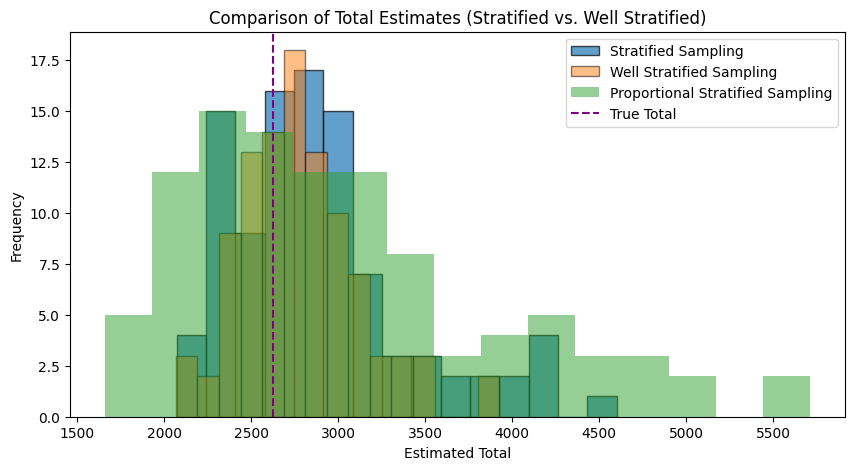

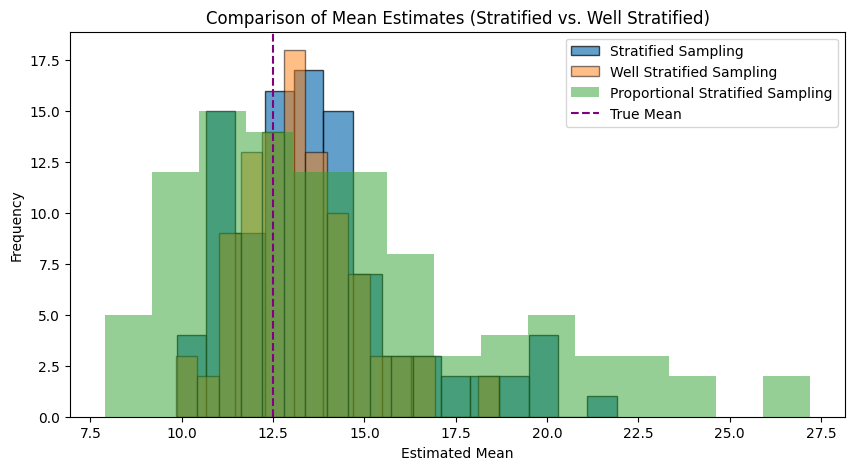

In [39]:
estimations_total_bienstrat = []
estimations_moyenne_bienstrat = []
for i in range(100):
    total_naissance_strat = 0
    # Définir les tailles d'échantillon pour chaque strate
    taille_echantillon_strates = pd.Series(optimal_sample_sizes_arrondis, index=[1., 2., 3., 4.])
    echantillon_bienstratifie = (
    paroisse
    .groupby('strate')
    .apply(lambda x: x.sample(taille_echantillon_strates[x.name]))
    .reset_index(drop=True))
    taille_strates = paroisse.groupby('strate').size()
    # On calcul la moyenne de la somme par strate :
    for strate in echantillon_bienstratifie['strate'].unique():
      total_naissance_strat += (echantillon_bienstratifie[echantillon_bienstratifie['strate'] == strate]['naissance'].sum() / probabilites_inclusion[strate])

    estimations_total_bienstrat.append(total_naissance_strat)
    estimations_moyenne_bienstrat.append(total_naissance_strat / 210)




real_sum = paroisse['naissance'].sum()
real_avg = real_sum / 210

plt.figure(figsize=(10, 5))
plt.hist(estimations_total_strat, bins=15, edgecolor='black', alpha=0.7, label='Stratified Sampling')
plt.hist(estimations_total_bienstrat, bins=15, edgecolor='black', alpha=0.5, label='Well Stratified Sampling')
plt.hist(estimations_total_prop, bins=15, alpha=0.5, label='Proportional Stratified Sampling')
plt.axvline(real_sum, color='purple', linestyle='--', label='True Total')
plt.title('Comparison of Total Estimates (Stratified vs. Well Stratified vs. Proportional)')
plt.xlabel('Estimated Total')
plt.ylabel('Frequency')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.hist(estimations_moyenne_strat, bins=15, edgecolor='black', alpha=0.7, label='Stratified Sampling')
plt.hist(estimations_moyenne_bienstrat, bins=15, edgecolor='black', alpha=0.5, label='Well Stratified Sampling')
plt.hist(estimations_moyenne_prop, bins=15, alpha=0.5, label='Proportional Stratified Sampling')
plt.axvline(real_avg, color='purple', linestyle='--', label='True Mean')
plt.title('Comparison of Mean Estimates (Stratified vs. Well Stratified vs. Proportional)')
plt.xlabel('Estimated Mean')
plt.ylabel('Frequency')
plt.legend()
plt.show()

>### 4.
Quel est l'incovénient pratique de cette méthode?